In [34]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style
import plotly.graph_objs as plotly  # for interactive plots
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import tensorflow as tf


In [35]:

from sklearn.decomposition import PCA
from wordcloud import WordCloud
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
import string, re
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import tensorflow as tf
from tensorflow.keras.utils import text_dataset_from_directory

# Import necessary libraries
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout,BatchNormalization,Flatten, TextVectorization, GlobalAveragePooling1D
from sklearn.model_selection import train_test_split

from tensorflow.keras.optimizers import Adam


from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [36]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
# Import necessary libraries
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout,  BatchNormalization
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.optimizers import Adam
from sklearn.feature_extraction.text import TfidfVectorizer


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Embedding

from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import GlobalAveragePooling1D

## Data Ingestion

In [38]:
#Load the datasets

reviews_df = pd.read_csv('train.csv')
#test_df = pd.read_csv('test.csv')

In [39]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      60000 non-null  int64 
 1   Review  60000 non-null  object
 2   Rating  60000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.4+ MB


In [40]:
reviews_df.head()

,Id,Review,Rating
0,0,Very good value and a great tv very happy and ...,5
1,1,After 6 month still can't access my account,3
2,2,I couldn't make an official review on a produc...,1
3,3,"Fantastic! Extremely easy to use website, fant...",5
4,4,So far annoyed as hell with this bt monthly pa...,1


In [41]:
reviews_df['Rating'].unique()

array([5, 3, 1, 4, 2])

In [42]:
reviews_df.shape

(60000, 3)

In [43]:
def sentiment_class(x):
  if x in (1,2):
    return 'negative'
  elif x == 3:
    return 'neutral'
  else:
    return 'positive'

reviews_df['Sentiment'] = reviews_df['Rating'].apply(sentiment_class)
reviews_df['Sentiment'].value_counts()

,count
Sentiment,
positive,38029
negative,20292
neutral,1679


In [44]:
#Example of neutral review
reviews_df[reviews_df.Rating== 3].iloc[76]['Review']

'The product and ordering were as expected, good. The delivery service provided by parcel force was awful.\nMay be the review should be about parcel force but unfortunately I am reviewing the whole experience. Parcel force delivered 2 days late on a next day and lied, first time said there was no one in when we have serviced offices with a reception, 2nd time said the address was inaccurate which is funny how they apparently found it the 1st & 3rd time. Wex are great but I would consider using another company next time as their appointed courier is unreliable.'

In [45]:
#Drop review if sentiment is netural
reviews_df = reviews_df[reviews_df['Sentiment']!= 'neutral']

reviews_df.head()

,Id,Review,Rating,Sentiment
0,0,Very good value and a great tv very happy and ...,5,positive
2,2,I couldn't make an official review on a produc...,1,negative
3,3,"Fantastic! Extremely easy to use website, fant...",5,positive
4,4,So far annoyed as hell with this bt monthly pa...,1,negative
5,5,Correct replacement delivered on time now my v...,5,positive


In [46]:

reviews_df['Sentiment'].unique(), reviews_df['Rating'].unique()

(array(['positive', 'negative'], dtype=object), array([5, 1, 4, 2]))

In [47]:
reviews_df.head()
print('reviews_df shape: ', reviews_df.shape)

reviews_df shape:  (58321, 4)


In [48]:
reviews_df = reviews_df.reset_index()
reviews_df

,index,Id,Review,Rating,Sentiment
0,0,0,Very good value and a great tv very happy and ...,5,positive
1,2,2,I couldn't make an official review on a produc...,1,negative
2,3,3,"Fantastic! Extremely easy to use website, fant...",5,positive
3,4,4,So far annoyed as hell with this bt monthly pa...,1,negative
4,5,5,Correct replacement delivered on time now my v...,5,positive
...,...,...,...,...,...
58316,59995,59995,"Response was very quick, engineer arrived when...",5,positive
58317,59996,59996,"I'm trying my best to leave TalkTalk, unfortun...",1,negative
58318,59997,59997,Just what do we get for paying this money for ...,1,negative
58319,59998,59998,Could not make our mind on which TV to purchas...,5,positive


In [49]:
# Apply random shuffling to dataset before splitting the data
np.random.seed(0)
indices = np.arange(reviews_df.shape[0])
shuffled_indices = np.random.permutation(indices)
reviews_df = reviews_df.reindex(shuffled_indices)

X = reviews_df[['Review', 'Rating']]
y = reviews_df['Sentiment']

In [50]:
#Create data training and testing splits
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=1234)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1234)

In [51]:
y_train.head()
X_train.head()

,Review,Rating
16051,I ordered a TV for my sons Christmas present w...,1
53063,"From the beginning when I ordered, everything ...",5
9363,We were moved to Shell when our previous energ...,5
24346,Service was excellent and the tv was a great p...,5
33871,"Ordered a product, wrong item was sent, never ...",1


## Exploratory Data Analysis

In [52]:
#display few examples of each type of rating and sentiment class
for i in range(5):
  print('training example data:', X_train.iloc[i])
  print('training example label:', y_train.iloc[i])


training example data: Review    I ordered a TV for my sons Christmas present w...
Rating                                                    1
Name: 16051, dtype: object
training example label: negative
training example data: Review    From the beginning when I ordered, everything ...
Rating                                                    5
Name: 53063, dtype: object
training example label: positive
training example data: Review    We were moved to Shell when our previous energ...
Rating                                                    5
Name: 9363, dtype: object
training example label: positive
training example data: Review    Service was excellent and the tv was a great p...
Rating                                                    5
Name: 24346, dtype: object
training example label: positive
training example data: Review    Ordered a product, wrong item was sent, never ...
Rating                                                    1
Name: 33871, dtype: object
training example la

,count
Rating,
2,989
4,2001
1,11194
5,20808


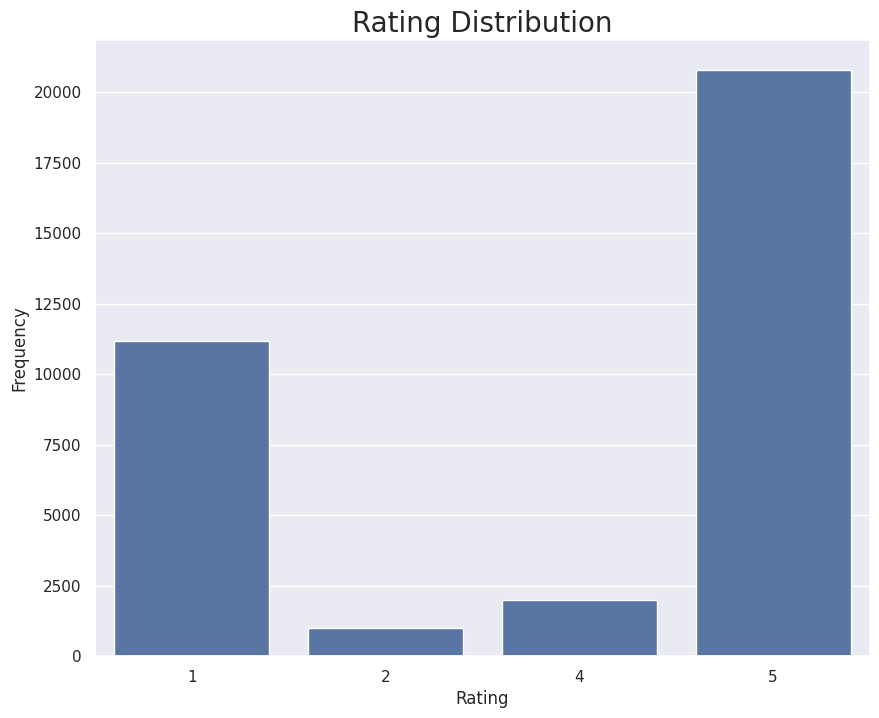

In [53]:
# View Train Rating Distribution
plt.figure(figsize=(10, 8))
plt.title('Rating Distribution', fontsize=20)

rating_distribution = X_train['Rating'].value_counts().sort_values()
sns.barplot(x=list(rating_distribution.keys()),y=rating_distribution.values)
plt.xlabel('Rating')
plt.ylabel('Frequency')
display(rating_distribution.sort_values())

,count
Sentiment,
negative,12183
positive,22809


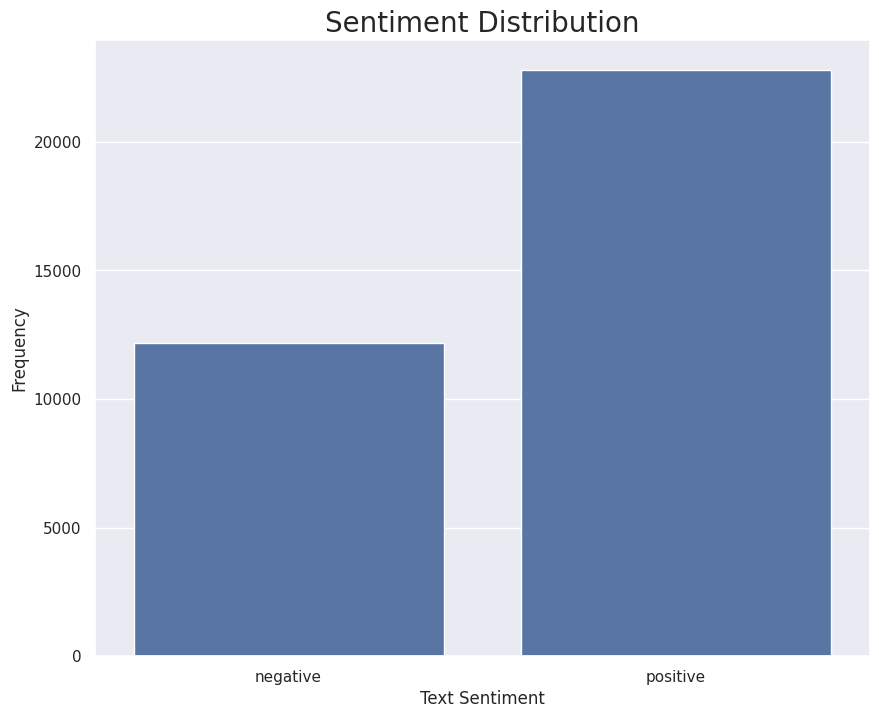

In [54]:
# View Sentiment Classification Distribution
plt.figure(figsize=(10, 8))
plt.title('Sentiment Distribution', fontsize=20)

sentiment_distribution = y_train.value_counts().sort_values()
sns.barplot(x=list(sentiment_distribution.keys()),
            y=sentiment_distribution.values)
plt.xlabel('Text Sentiment')
plt.ylabel('Frequency')
display(sentiment_distribution.sort_values())

In [55]:
#Create a balanced dataset

# randomly draw 46000 examples from each class
df_balanced = pd.concat(
    [X_train, y_train],
    axis=1)


temp_positive = df_balanced[df_balanced.Sentiment == 'positive'].sample(
    n=12000,
    replace=False
)

temp_negative = df_balanced[df_balanced.Sentiment == 'negative'].sample(
    n=12000,
    replace=False
)

df_balanced = pd.concat(
    [temp_positive, temp_negative],
    axis=0)

# shuffle df_balanced
df_balanced = df_balanced.sample(frac=1) # frac=1 retains all the data
df_balanced.reset_index(drop=True, inplace=True) # reset index

print('After preprocessing, our data contains', df_balanced.shape[0], 'reviews.')

After preprocessing, our data contains 24000 reviews.


In [56]:
#Find average length of reviews for each sentiment classification
df_balanced['Review_Length'] = df_balanced['Review'].apply(lambda x: len(x.split()))
pos_review_length_avg = df_balanced[df_balanced['Sentiment']== 'positive']['Review_Length'].mean()
neg_review_length_avg = df_balanced[df_balanced['Sentiment']== 'negative']['Review_Length'].mean()
review_length_avg = df_balanced['Review_Length'].mean()
print('Average positive review length: ', pos_review_length_avg)
print('Average negative review length: ', neg_review_length_avg)
print('Average review length: ', review_length_avg)

Average positive review length:  28.017583333333334
Average negative review length:  109.60616666666667
Average review length:  68.811875


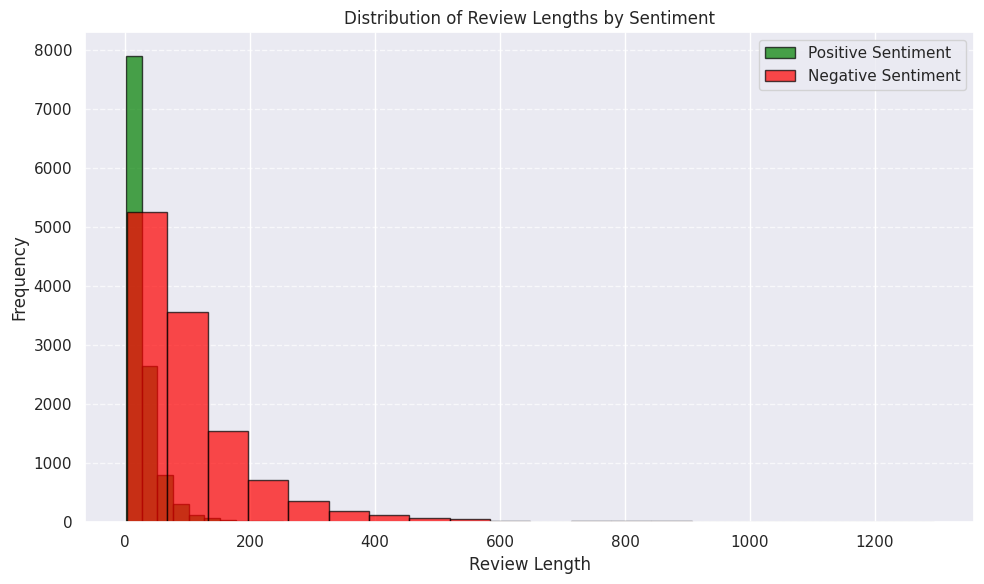

In [57]:
#Distribution of Review Length for Positive vs Negative Reviews
df_balanced['Distinct_Words'] = df_balanced['Review'].apply(lambda x:len(np.unique(x.lower().split())))

# Separate data based on sentiment
positive = df_balanced[df_balanced['Sentiment'] == 'positive']['Review_Length']
negative = df_balanced[df_balanced['Sentiment'] == 'negative']['Review_Length']

# Plot the distributions
plt.figure(figsize=(10, 6))
plt.hist(positive, bins=20, alpha=0.7, label='Positive Sentiment', color='green', edgecolor='black')
plt.hist(negative, bins=20, alpha=0.7, label='Negative Sentiment', color='red', edgecolor='black')

# Add plot details
plt.title('Distribution of Review Lengths by Sentiment')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

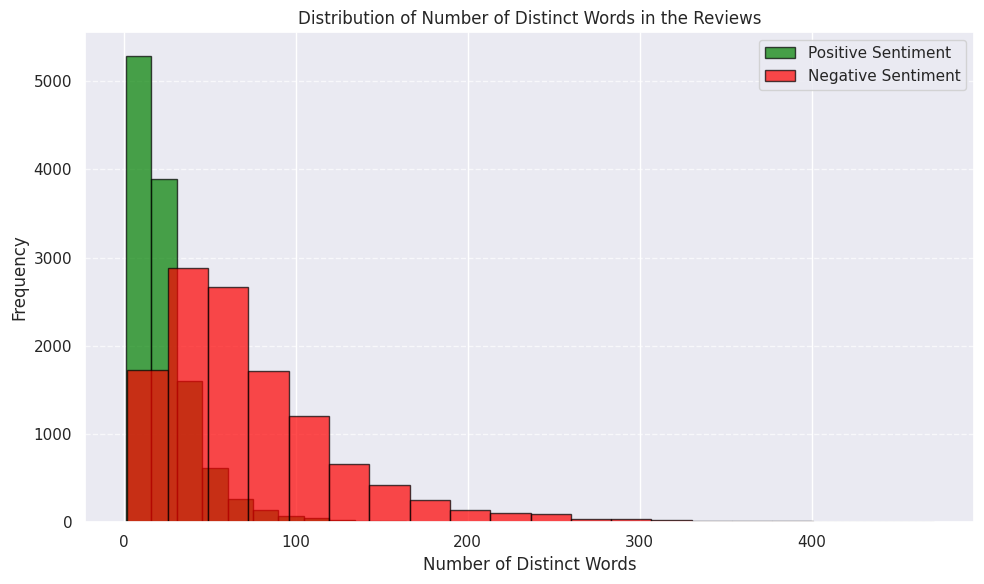

In [58]:
#Distribution of Distinct Words in a Review for Positive vs Negative Reviews
df_balanced['Distinct_Words'] = df_balanced['Review'].apply(lambda x:len(np.unique(x.lower().split())))

# Separate data based on sentiment
positive = df_balanced[df_balanced['Sentiment'] == 'positive']['Distinct_Words']
negative = df_balanced[df_balanced['Sentiment'] == 'negative']['Distinct_Words']

# Plot the distributions
plt.figure(figsize=(10, 6))
plt.hist(positive, bins=20, alpha=0.7, label='Positive Sentiment', color='green', edgecolor='black')
plt.hist(negative, bins=20, alpha=0.7, label='Negative Sentiment', color='red', edgecolor='black')

# Add plot details
plt.title('Distribution of Number of Distinct Words in the Reviews')
plt.xlabel('Number of Distinct Words')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [59]:
df_balanced

,Review,Rating,Sentiment,Review_Length,Distinct_Words
0,"They are bad company, charging £225.00 per mon...",1,negative,171,125
1,I ordered a new router from BT.(hub2). The eng...,1,negative,145,86
2,"It’s been great and more than satisfying, reco...",5,positive,23,21
3,Had broadband for a year all seemed fine\nHave...,1,negative,55,46
4,"Excellent communication, top notch product. Co...",5,positive,11,11
...,...,...,...,...,...
23995,Great price and product. Computer runs so much...,5,positive,10,10
23996,Absolutely terrible. Please don't even go into...,1,negative,109,80
23997,I used a voucher code from Unidays which I tho...,1,negative,276,159
23998,"Really good service, the Phone arrived very qu...",5,positive,18,18


In [60]:
#Transform categorical y variable to be binary, numerical format
# (0= negative, positive = 1)
X_train = df_balanced['Review']
y_train = df_balanced['Sentiment']
y_train = np.where(y_train.eq('positive'), 1, 0)

X_val = X_val['Review']
y_val = np.where(y_val.eq('positive'), 1, 0)

X_test = X_test['Review']
y_test = np.where(y_test.eq('positive'), 1, 0)

## Data Pre-Processing

In [61]:
# remove punctuation and other non-letter characters
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',
                           text)
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))

    return text

X_train

,Review
0,"They are bad company, charging £225.00 per mon..."
1,I ordered a new router from BT.(hub2). The eng...
2,"It’s been great and more than satisfying, reco..."
3,Had broadband for a year all seemed fine\nHave...
4,"Excellent communication, top notch product. Co..."
...,...
23995,Great price and product. Computer runs so much...
23996,Absolutely terrible. Please don't even go into...
23997,I used a voucher code from Unidays which I tho...
23998,"Really good service, the Phone arrived very qu..."


In [62]:
#Apply data preprocessing to all input datasets
X_train = X_train.apply(preprocessor)
X_val = X_val.apply(str).apply(preprocessor)
X_test = X_test.apply(str).apply(preprocessor)


In [83]:
X_train.iloc[2]

'it s been great and more than satisfying recommending plugin boutique to anyone looking for good plugins with great deals and excellent bundles '

### Baseline Models

In [30]:
# Basline Model: SGD Classifier
pipe = Pipeline([
  ('vec', CountVectorizer(min_df=1000, preprocessor=preprocessor)),
  ('tfid', TfidfTransformer()),
  ('lr', SGDClassifier(loss='log_loss'))
])

# fit the model to the data
model = pipe.fit(X_train, y_train)

# predict sentiment on the test data frame
y_val_pred = model.predict(X_val)

# create the classification report
report = classification_report(y_val, y_val_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      4081
           1       0.97      0.92      0.94      7583

    accuracy                           0.93     11664
   macro avg       0.91      0.93      0.92     11664
weighted avg       0.93      0.93      0.93     11664



In [31]:
#Baseline Model: Simple neural networks architecture

# Initialize the TF-IDF Vectorizer for data processing
vectorizer = TfidfVectorizer(max_features=1000)  # Limit to 1000 features for simplicity

# Fit and transform the reviews into numerical features
X_train_vec = vectorizer.fit_transform(np.array(X_train)).toarray()
X_val_vec = vectorizer.fit_transform(np.array(X_val)).toarray() # transform validation data
X_test_vec = vectorizer.fit_transform(np.array(X_test)).toarray() # transform test data


# Define a simple neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_vec.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_history = model.fit(X_train_vec, np.array(y_train), epochs=5, batch_size=32,
          validation_data=(X_val_vec, np.array(y_val)))

# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_val_vec, np.array(y_val))
print(f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")


test_loss, test_accuracy = model.evaluate(X_test_vec, np.array(y_test))
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - accuracy: 0.8312 - loss: 0.3739 - val_accuracy: 0.7372 - val_loss: 0.6066
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9455 - loss: 0.1471 - val_accuracy: 0.7438 - val_loss: 0.6537
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9528 - loss: 0.1294 - val_accuracy: 0.7431 - val_loss: 0.6917
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9569 - loss: 0.1213 - val_accuracy: 0.7425 - val_loss: 0.6748
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9644 - loss: 0.1050 - val_accuracy: 0.7503 - val_loss: 0.6915
365/365 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7569 - loss: 0.6677
Val Loss: 0.6915, Val Accuracy: 0.7503
365/365 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7195 - loss: 0.7521
Test Loss: 0.7626, Test Accuracy: 0.7159


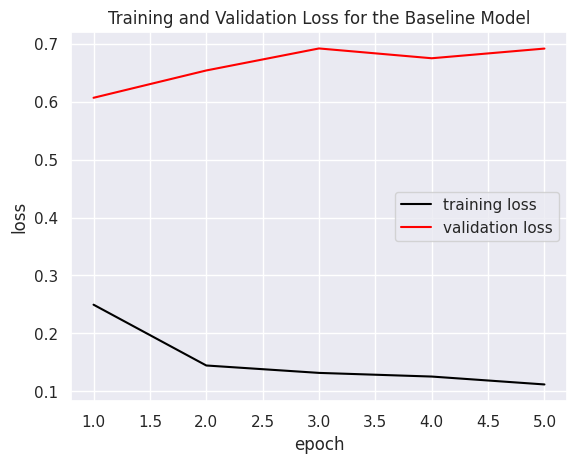

final train loss: 0.11191145
final train accuracy: 0.96058333
final val loss: 0.69151270
final val accuracy: 0.75034297


In [32]:
#Generate plot for loss values for the baseline model
# Plot the loss at each epoch and show final numbers.
# Plot training loss
plt.plot(range(1, len(model_history.history['loss']) + 1),
         model_history.history['loss'], color='black', label='training loss')

#Plot validation loss
plt.plot(range(1, len(model_history.history['val_loss']) + 1),
         model_history.history['val_loss'], color='red', label='validation loss')
plt.title("Training and Validation Loss for the Baseline Model")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

print('final train loss: %.8f' %model_history.history['loss'][-1])
print('final train accuracy: %.8f' %model_history.history['accuracy'][-1])

print('final val loss: %.8f' %model_history.history['val_loss'][-1])
print('final val accuracy: %.8f' %model_history.history['val_accuracy'][-1])

## Model Improvements

### LSTM modeling

In [30]:
tf.random.set_seed(1)
# Model Improvement with Embedding + LSTM model
# Tokenize the text data
vocab_size = 1000  # Vocabulary size
oov_token = "<OOV>"  # Out-of-vocabulary token
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)

#create the vocabulary list based on reviews
tokenizer.fit_on_texts(np.array(X_train))

# Convert text to numerical sequences
X_train_sequences = tokenizer.texts_to_sequences(np.array(X_train))
X_val_sequences = tokenizer.texts_to_sequences(np.array(X_val))
X_test_sequences = tokenizer.texts_to_sequences(np.array(X_test))

# Pad sequences to make sure all reviews are the same input length
max_length = 400  # Maximum length of sequences
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post', truncating='post')
X_val_padded = pad_sequences(X_val_sequences, maxlen=max_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding='post', truncating='post')

tf.random.set_seed(1)


# Define LSTM neural network model with an embedding layer + Bidirectional LSTM
embedding_dim = 10  # Size of the embedding vectors


bi_lstm_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    Bidirectional(LSTM(64, return_sequences=True, dropout=0.2)),  # LSTM layer for sequence modeling
    Bidirectional(LSTM(32, dropout=0.2)),
    Dense(32, activation='relu'),
    #Dropout(0.5),
    Dense(1, activation='sigmoid')  #binary classification
])


bi_lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


#Train the model
bi_lstm_model_history = bi_lstm_model.fit(np.array(X_train_padded), np.array(y_train), epochs=15, batch_size=32,callbacks=[EarlyStopping(monitor='loss',patience=3)],
          validation_data=(np.array(X_val_padded), np.array(y_val)))

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 541s 712ms/step - accuracy: 0.8437 - loss: 0.3317 - val_accuracy: 0.9574 - val_loss: 0.1251
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 564s 753ms/step - accuracy: 0.9284 - loss: 0.1905 - val_accuracy: 0.9522 - val_loss: 0.1264
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 604s 729ms/step - accuracy: 0.9578 - loss: 0.1213 - val_accuracy: 0.9617 - val_loss: 0.1104
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 589s 765ms/step - accuracy: 0.9605 - loss: 0.1080 - val_accuracy: 0.9635 - val_loss: 0.1089
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 606s 744ms/step - accuracy: 0.9622 - loss: 0.1081 - val_accuracy: 0.9609 - val_loss: 0.1158
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 558s 739ms/step - accuracy: 0.9671 - loss: 0.0953 - val_accuracy: 0.9635 - val_loss: 0.1071
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 559s 746ms/step - accuracy: 0.9695 - loss: 0.0916 - val_accuracy: 0.9621 - val_loss: 0.1125
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 561s 744ms/step - accuracy: 0.9708 -

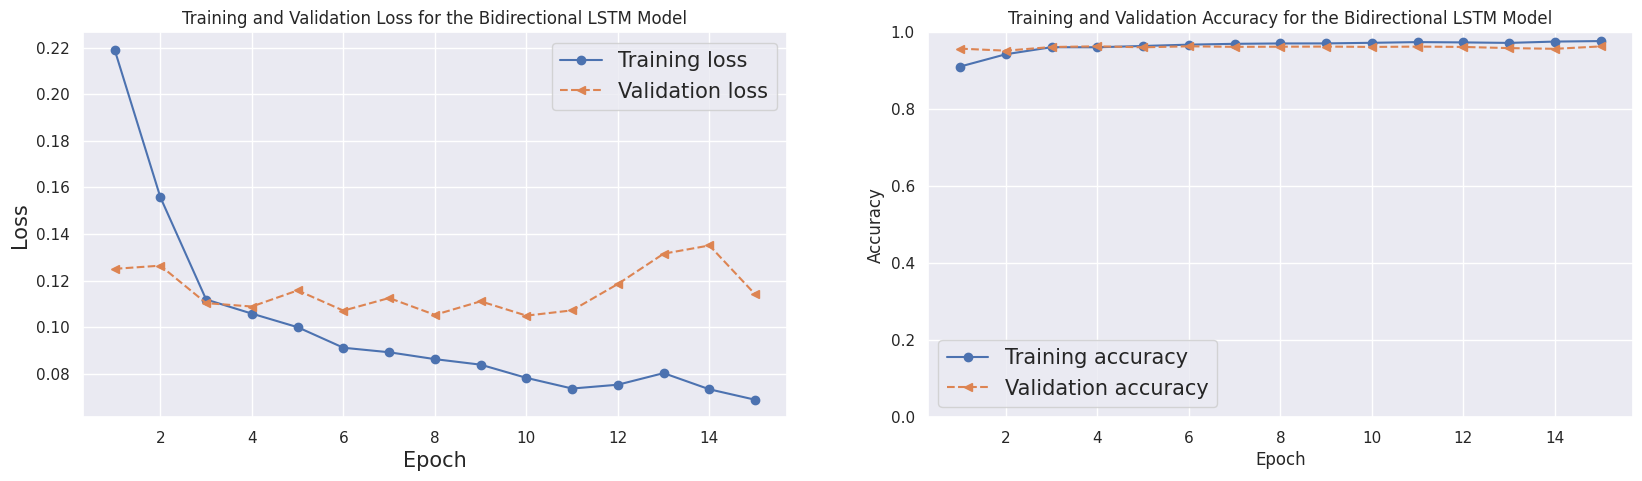

final train loss: 0.069
final train accuracy: 0.977
final val loss: 0.114
final val accuracy: 0.963


In [31]:
#Plot curves for BiLSTM Model
x_arr = np.arange(len(bi_lstm_model_history.history['loss'])) + 1

#Plot loss curves
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, bi_lstm_model_history.history['loss'], '-o', label='Training loss')
ax.plot(x_arr, bi_lstm_model_history.history['val_loss'], '--<', label='Validation loss')
ax.set_title("Training and Validation Loss for the Bidirectional LSTM Model")
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

#Plot accuracy curves
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, bi_lstm_model_history.history['accuracy'], '-o', label='Training accuracy')
ax.plot(x_arr, bi_lstm_model_history.history['val_accuracy'], '--<', label='Validation accuracy')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.set_title("Training and Validation Accuracy for the Bidirectional LSTM Model")
ax.set_ylim(0,1)
plt.show()

print('final train loss: %.3f' %bi_lstm_model_history.history['loss'][-1])
print('final train accuracy: %.3f' %bi_lstm_model_history.history['accuracy'][-1])

print('final val loss: %.3f' %bi_lstm_model_history.history['val_loss'][-1])
print('final val accuracy: %.3f' %bi_lstm_model_history.history['val_accuracy'][-1])

In [32]:
bi_lstm_test_loss, bi_lstm_test_accuracy = bi_lstm_model.evaluate(X_test_padded, np.array(y_test))
print(f"Test Loss: {bi_lstm_test_loss:.4f}, Test Accuracy: {bi_lstm_test_accuracy:.4f}")

365/365 ━━━━━━━━━━━━━━━━━━━━ 59s 161ms/step - accuracy: 0.9646 - loss: 0.1087
Test Loss: 0.1111, Test Accuracy: 0.9628


Test model on sample company reviews

In [118]:
reviews_sample_df = pd.read_csv('Final_Company_Reviews.csv')
reviews_sample_df = reviews_sample_df[reviews_sample_df['Star Rating'] != 3]
reviews_sample_df['Sentiment'] = reviews_sample_df['Star Rating'].apply(lambda x: 0 if x==1 else 1)

reviews_sample_df_X = reviews_sample_df['Review Text']
reviews_sample_df_y = reviews_sample_df['Sentiment']

sample_sequences = tokenizer.texts_to_sequences(np.array(reviews_sample_df_X))
sample_padded = pad_sequences(sample_sequences, maxlen=400, padding='post', truncating='post')

In [119]:
reviews_sample_df

,Company,Star Rating,Review Text,Sentiment
0,Veeva Systems,1,Toxic Nepo Bullies. If you are remote you can ...,0
2,Veeva Systems,5,"Stable, good growth, manager dependent. : A re...",1
3,Lockheed Martin,1,"High tech, low pay. : They have spacecraft tha...",0
5,Lockheed Martin,5,Lockheed Martin IT. : High level of integrity ...,1
6,Splunk,1,POC are at a strong disadvantage. : The benefi...,0
8,Splunk,5,"Great Place to work, engineers input matters. ...",1
9,Integral Ad Science,1,Once upon a time... a good place. : Once upon ...,0
11,Integral Ad Science,5,High visibility and opportunity to make impact...,1


In [120]:
sample_padded = pad_sequences(sample_sequences, maxlen=400, padding='post', truncating='post')
bi_lstm_model.evaluate(sample_padded, np.array(reviews_sample_df_y))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.7500 - loss: 0.9112


[0.9111655354499817, 0.75]

In [121]:
bi_lstm_model.predict(sample_padded)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


array([[0.00965777],
       [0.9943811 ],
       [0.01177653],
       [0.6839277 ],
       [0.0270542 ],
       [0.9988473 ],
       [0.9893343 ],
       [0.09897061]], dtype=float32)

In [122]:
reviews_sample_df_X.iloc[6]

'Once upon a time... a good place. : Once upon a time they focused on the best interests of employees, which in return ductivity was high, C suite was respected. That all went downhill with greed and mass layoffs. : New leadership team is horrible, they are entirely focused on making themselves look good, while pushing out great employees and treating their staff like crap. Advice to Management: Get rid of your leadership team, and go back to treating employees like humans!'

#### Bidirectional LSTM Hyperparameter Experimentation:

Test different hyperparameter values: max length = 200 and embedding dimension value = 150 and vocab size = 10000

In [ ]:
#BiLSTM Hyperparameter tuning: testing different max length and embedding dim
tf.random.set_seed(1)
# Model Improvement with Embedding + LSTM model
# Tokenize the text data
vocab_size = 10000  # Vocabulary size
oov_token = "<OOV>"  # Out-of-vocabulary token
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)

#create the vocabulary list based on reviews
tokenizer.fit_on_texts(np.array(X_train))


# Convert text to numerical feature representation
X_train_sequences = tokenizer.texts_to_sequences(np.array(X_train))
X_val_sequences = tokenizer.texts_to_sequences(np.array(X_val))
X_test_sequences = tokenizer.texts_to_sequences(np.array(X_test))

# Pad sequences to make sure all reviews are the same input length
max_length = 200  # Maximum length of sequences
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post', truncating='post')
X_val_padded = pad_sequences(X_val_sequences, maxlen=max_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding='post', truncating='post')

tf.random.set_seed(1)


# Define LSTM neural network model with an embedding layer + Bidirectional LSTM
embedding_dim = 150  # Size of the embedding vectors


bi_lstm_model2 = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    Bidirectional(LSTM(64, return_sequences=True, dropout=0.2)),  # LSTM layer for sequence modeling
    Bidirectional(LSTM(32, dropout=0.2)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  #binary classification
])


bi_lstm_model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


#Train the model
bi_lstm_model_history2 = bi_lstm_model2.fit(np.array(X_train_padded), np.array(y_train), epochs=40, batch_size=32,callbacks=[EarlyStopping(monitor='loss',patience=3)],
          validation_data=(np.array(X_val_padded), np.array(y_val)))

Epoch 1/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 357s 467ms/step - accuracy: 0.8875 - loss: 0.2588 - val_accuracy: 0.9628 - val_loss: 0.1064
Epoch 2/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 351s 427ms/step - accuracy: 0.9658 - loss: 0.1009 - val_accuracy: 0.9662 - val_loss: 0.1054
Epoch 3/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 314s 416ms/step - accuracy: 0.9757 - loss: 0.0798 - val_accuracy: 0.9582 - val_loss: 0.1317
Epoch 4/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 330s 427ms/step - accuracy: 0.9847 - loss: 0.0543 - val_accuracy: 0.9618 - val_loss: 0.1306
Epoch 5/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 322s 427ms/step - accuracy: 0.9874 - loss: 0.0431 - val_accuracy: 0.9617 - val_loss: 0.1317
Epoch 6/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 315s 417ms/step - accuracy: 0.9902 - loss: 0.0357 - val_accuracy: 0.9472 - val_loss: 0.2025
Epoch 7/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 320s 414ms/step - accuracy: 0.9891 - loss: 0.0373 - val_accuracy: 0.9604 - val_loss: 0.1615
Epoch 8/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 323s 416ms/step - accuracy: 0.9932 -

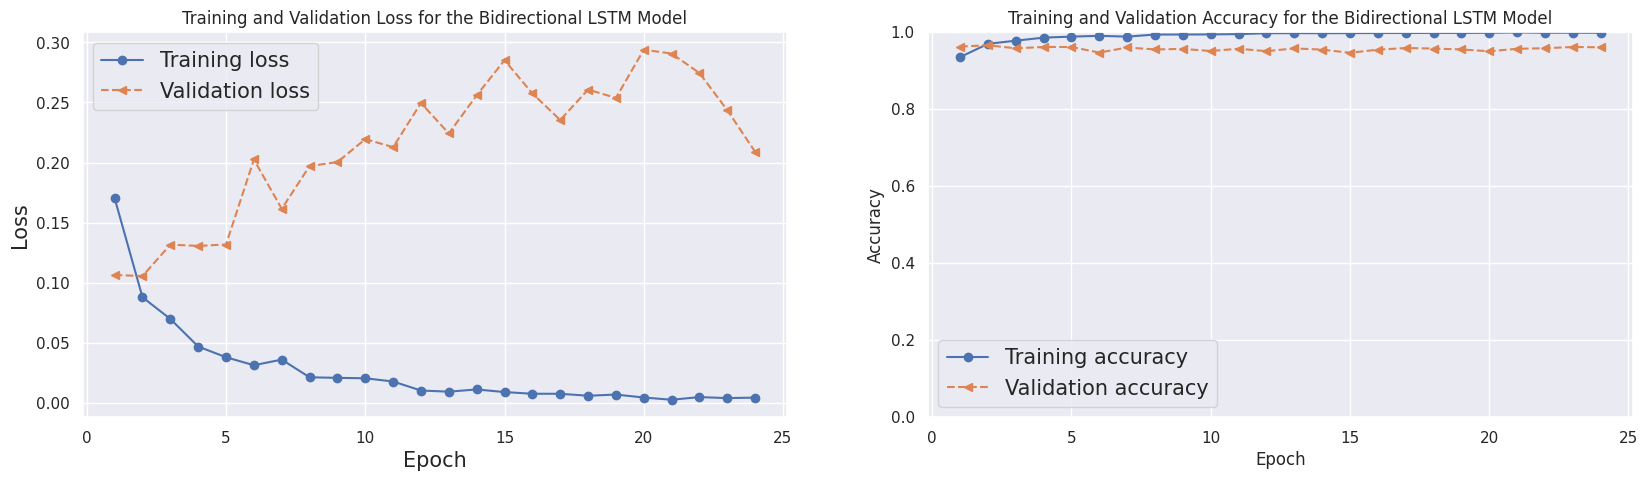

final train loss: 0.004
final train accuracy: 0.999
final val loss: 0.209


In [31]:
#Plot curves for BiLSTM Model experimentation
x_arr = np.arange(len(bi_lstm_model_history2.history['loss'])) + 1

#Plot loss curves
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, bi_lstm_model_history2.history['loss'], '-o', label='Training loss')
ax.plot(x_arr, bi_lstm_model_history2.history['val_loss'], '--<', label='Validation loss')
ax.set_title("Training and Validation Loss for the Bidirectional LSTM Model")
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

#Plot accuracy curves
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, bi_lstm_model_history2.history['accuracy'], '-o', label='Training accuracy')
ax.plot(x_arr, bi_lstm_model_history2.history['val_accuracy'], '--<', label='Validation accuracy')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.set_title("Training and Validation Accuracy for the Bidirectional LSTM Model")
ax.set_ylim(0,1)
plt.show()

print('final train loss: %.3f' %bi_lstm_model_history2.history['loss'][-1])
print('final train accuracy: %.3f' %bi_lstm_model_history2.history['accuracy'][-1])
print('final val loss: %.3f' %bi_lstm_model_history2.history['val_loss'][-1])

In [32]:
bi_lstm_test_loss, bi_lstm_test_accuracy = bi_lstm_model2.evaluate(X_test_padded, np.array(y_test))
print(f"Test Loss: {bi_lstm_test_loss:.4f}, Test Accuracy: {bi_lstm_test_accuracy:.4f}")

365/365 ━━━━━━━━━━━━━━━━━━━━ 56s 153ms/step - accuracy: 0.9606 - loss: 0.2039
Test Loss: 0.1992, Test Accuracy: 0.9628


Test performance if dropout layers were removed

In [38]:
#BiLSTM Hyperparameter Experimentation: testing effect of dropout layers
tf.random.set_seed(1)
# Model Improvement with Embedding + LSTM model
# Tokenize the text data
vocab_size = 1000  # Vocabulary size
oov_token = "<OOV>"  # Out-of-vocabulary token
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)

#create the vocabulary list based on reviews
tokenizer.fit_on_texts(np.array(X_train))

# Convert text to sequences
#sequences = tokenizer.texts_to_sequences(np.array(X_train))


# Convert text to numerical feature representation
X_train_sequences = tokenizer.texts_to_sequences(np.array(X_train))
X_val_sequences = tokenizer.texts_to_sequences(np.array(X_val))
X_test_sequences = tokenizer.texts_to_sequences(np.array(X_test))

# Pad sequences to make sure all reviews are the same input length
max_length = 400  # Maximum length of sequences
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post', truncating='post')
X_val_padded = pad_sequences(X_val_sequences, maxlen=max_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding='post', truncating='post')

tf.random.set_seed(1)


# Define LSTM neural network model with an embedding layer + Bidirectional LSTM
embedding_dim = 8  # Size of the embedding vectors


bi_lstm_model3 = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    Bidirectional(LSTM(64, return_sequences=True)),  # LSTM layer for sequence modeling
    Bidirectional(LSTM(32)),
    Dense(32, activation='relu'),
    #Dropout(0.5),
    Dense(1, activation='sigmoid')  #binary classification
])


bi_lstm_model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


#Train the model
bi_lstm_model_history3 = bi_lstm_model3.fit(np.array(X_train_padded), np.array(y_train), epochs=15, batch_size=32,callbacks=[EarlyStopping(monitor='loss',patience=3)],
          validation_data=(np.array(X_val_padded), np.array(y_val)))

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 529s 693ms/step - accuracy: 0.8583 - loss: 0.3099 - val_accuracy: 0.9518 - val_loss: 0.1436
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 568s 702ms/step - accuracy: 0.9542 - loss: 0.1270 - val_accuracy: 0.9542 - val_loss: 0.1190
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 524s 698ms/step - accuracy: 0.9585 - loss: 0.1146 - val_accuracy: 0.9506 - val_loss: 0.1367
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 566s 704ms/step - accuracy: 0.9561 - loss: 0.1225 - val_accuracy: 0.9576 - val_loss: 0.1155
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 564s 707ms/step - accuracy: 0.9669 - loss: 0.0962 - val_accuracy: 0.9606 - val_loss: 0.1102
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 562s 706ms/step - accuracy: 0.9683 - loss: 0.0910 - val_accuracy: 0.9599 - val_loss: 0.1152
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 561s 706ms/step - accuracy: 0.9694 - loss: 0.0900 - val_accuracy: 0.9605 - val_loss: 0.1133
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 588s 741ms/step - accuracy: 0.9714 -

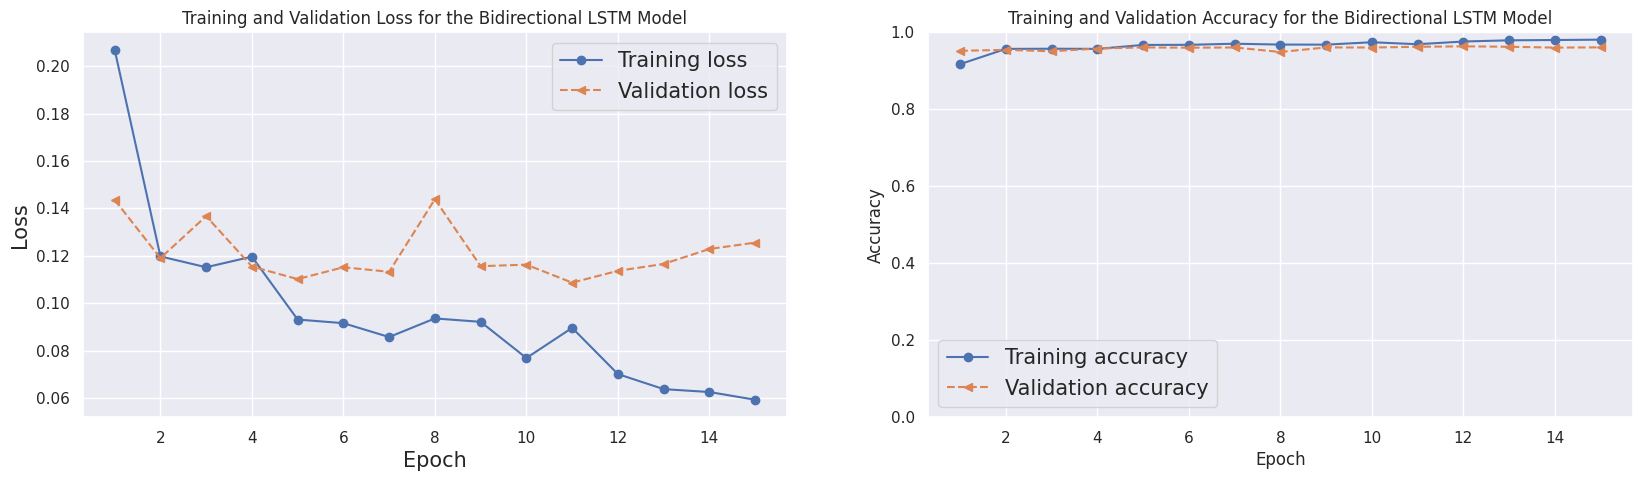

final train loss: 0.059
final train accuracy: 0.981
final val loss: 0.126
final val accuracy: 0.961


In [39]:
#hist = history.history
x_arr = np.arange(len(bi_lstm_model_history3.history['loss'])) + 1

#Plot loss curves
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, bi_lstm_model_history3.history['loss'], '-o', label='Training loss')
ax.plot(x_arr, bi_lstm_model_history3.history['val_loss'], '--<', label='Validation loss')
ax.set_title("Training and Validation Loss for the Bidirectional LSTM Model")
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

#Plot accuracy curves
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, bi_lstm_model_history3.history['accuracy'], '-o', label='Training accuracy')
ax.plot(x_arr, bi_lstm_model_history3.history['val_accuracy'], '--<', label='Validation accuracy')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.set_title("Training and Validation Accuracy for the Bidirectional LSTM Model")
ax.set_ylim(0,1)
plt.show()

print('final train loss: %.3f' %bi_lstm_model_history3.history['loss'][-1])
print('final train accuracy: %.3f' %bi_lstm_model_history3.history['accuracy'][-1])

print('final val loss: %.3f' %bi_lstm_model_history3.history['val_loss'][-1])
print('final val accuracy: %.3f' %bi_lstm_model_history3.history['val_accuracy'][-1])

### CNN Modeling

CNN with 3 convolutional layers

In [42]:
#CNN with 3 convolutional layers
# Tokenize the text data
vocab_size = 1000  # Vocabulary size
oov_token = "<OOV>"  # Out-of-vocabulary token
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)

#create the vocabulary list based on reviews
tokenizer.fit_on_texts(np.array(X_train))


# Convert text to numerical sequences
X_train_sequences = tokenizer.texts_to_sequences(np.array(X_train))
X_val_sequences = tokenizer.texts_to_sequences(np.array(X_val))
X_test_sequences = tokenizer.texts_to_sequences(np.array(X_test))

# Pad sequences to make sure all reviews are the same input length
max_length = 400  # Maximum length of sequences
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post', truncating='post')
X_val_padded = pad_sequences(X_val_sequences, maxlen=max_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding='post', truncating='post')

tf.random.set_seed(1)

# Embed our training vocabulary into 10 dimensions.
embedding_dim = 10

def build_model():
    ''''''
    # clear session and set a random seed for consistent behavior.
    tf.keras.backend.clear_session()
    tf.random.set_seed(1)

    # define model
    model = tf.keras.Sequential()

    ## add embedding layer ##
    #########################
    # (this is our input layer)
    # embeddings will be learned during training
    # the weights for the embeddings are randomly initialized (just like any other layer!)
    model.add(Embedding(
        input_dim=vocab_size,
        output_dim=10,
        input_length=400, #limits length of sentence to 100 tokens
        name="embedding")
        ),

    ## first convolution ##
    #######################
    model.add(Conv1D(
        filters=128,
        kernel_size=4,
        padding='same',
        activation='relu'))

    # add dropout layer
    model.add(tf.keras.layers.Dropout(
        rate=0.5))

    # add maxpooling
    model.add(MaxPooling1D(pool_size=2))

    ## second convolution ##
    ########################
    model.add(Conv1D(
        filters=64,
        kernel_size=4,
        padding='same',
        activation='relu'))

    # add dropout layer
    model.add(tf.keras.layers.Dropout(
        rate=0.5))

    # add maxpooling
    model.add(MaxPooling1D(pool_size=2))

    ## third convolution ##
    #######################
    model.add(Conv1D(
        filters=32,
        kernel_size=5,
        padding='same',
        activation='relu'))

    # add dropout layer
    model.add(tf.keras.layers.Dropout(
        rate=0.5))

    # add maxpooling
    model.add(MaxPooling1D(pool_size=2))

    ## average embeddings ##
    ########################
    model.add(GlobalAveragePooling1D()),

    # add dropout layer
    model.add(tf.keras.layers.Dropout(
        rate=0.5))



    ## add final dense (output) layer ##
    ####################################
    model.add(Dense(1, activation='sigmoid'))

    # save embeddings before training
    #embeddings_untrained = model.get_layer('embedding').get_weights()[0]

    # print model summary
    model.summary()

    return model


model_cnn_2 = build_model()

model_cnn_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

tf.random.set_seed(1)
np.random.seed(1)
model_cnn_2_history = model_cnn_2.fit(
    np.array(X_train_padded), np.array(y_train), epochs=10,
          validation_data=(np.array(X_val_padded), np.array(y_val)))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 99s 130ms/step - accuracy: 0.8139 - loss: 0.4430 - val_accuracy: 0.9175 - val_loss: 0.3926
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 160s 154ms/step - accuracy: 0.9214 - loss: 0.2314 - val_accuracy: 0.9444 - val_loss: 0.2462
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 125s 132ms/step - accuracy: 0.9489 - loss: 0.1566 - val_accuracy: 0.9571 - val_loss: 0.1770
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 138s 127ms/step - accuracy: 0.9552 - loss: 0.1393 - val_accuracy: 0.9564 - val_loss: 0.1682
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 138s 122ms/step - accuracy: 0.9626 - loss: 0.1184 - val_accuracy: 0.9571 - val_loss: 0.1553
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 92s 123ms/step - accuracy: 0.9636 - loss: 0.1126 - val_accuracy: 0.9504 - val_loss: 0.1733
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 88s 118ms/step - accuracy: 0.9639 - loss: 0.1120 - val_accuracy: 0.9583 - val_loss: 0.1456
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 144s 121ms/step - accuracy: 0.9658 - lo

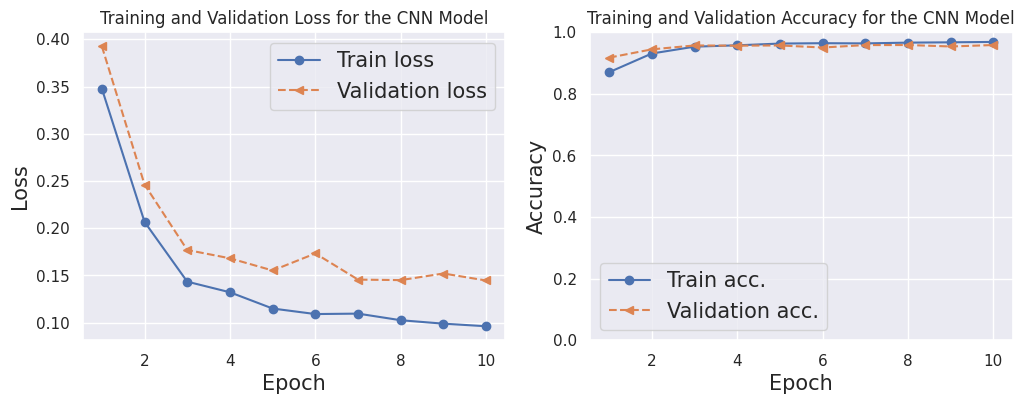

final train loss: 0.096
final train accuracy: 0.969
final val loss: 0.145
final val accuracy: 0.959


In [43]:
#Plot CNN performance curves- training vs validation accuracy and loss curves
hist = model_cnn_2_history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.set_title("Training and Validation Loss for the CNN Model")

ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
ax.set_title("Training and Validation Accuracy for the CNN Model")
ax.set_ylim(0,1)
plt.show()

print('final train loss: %.3f' %model_cnn_2_history.history['loss'][-1])
print('final train accuracy: %.3f' %model_cnn_2_history.history['accuracy'][-1])

print('final val loss: %.3f' %model_cnn_2_history.history['val_loss'][-1])
print('final val accuracy: %.3f' %model_cnn_2_history.history['val_accuracy'][-1])

In [123]:
#CNN with 2 convolutional layers
np.random.seed(1)

# Tokenize the text data
vocab_size = 1000  # Vocabulary size
oov_token = "<OOV>"  # Out-of-vocabulary token
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)

#create the vocabulary list based on reviews
tokenizer.fit_on_texts(np.array(X_train))


# Convert text to numerical sequences
X_train_sequences = tokenizer.texts_to_sequences(np.array(X_train))
X_val_sequences = tokenizer.texts_to_sequences(np.array(X_val))
X_test_sequences = tokenizer.texts_to_sequences(np.array(X_test))

# Pad sequences to make sure all reviews are the same input length
max_length = 400  # Maximum length of sequences
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post', truncating='post')
X_val_padded = pad_sequences(X_val_sequences, maxlen=max_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding='post', truncating='post')

tf.random.set_seed(1)

# Embed our training vocabulary into 10 dimensions.
embedding_dim = 10

def build_model():
    ''''''
    # clear session and set a random seed for consistent behavior.
    tf.keras.backend.clear_session()
    tf.random.set_seed(1)

    # define model
    model = tf.keras.Sequential()

    ## add embedding layer ##
    #########################
    # (this is our imput layer)
    # embeddings will be learned during training
    # the weights for the embeddings are randomly initialized (just like any other layer!)
    model.add(Embedding(
        input_dim=vocab_size,
        output_dim=10,
        input_length=400, #limits length of sentence to 400 tokens
        name="embedding")
        ),

    ## first convolution ##
    #######################
    model.add(Conv1D(
        filters=128,
        kernel_size=4,
        padding='same',
        activation='relu'))

    # add dropout layer
    model.add(tf.keras.layers.Dropout(
        rate=0.5))

    # add maxpooling
    model.add(MaxPooling1D(pool_size=2))

    ## second convolution ##
    ########################
    model.add(Conv1D(
        filters=64,
        kernel_size=4,
        padding='same',
        activation='relu'))

    # add dropout layer
    model.add(tf.keras.layers.Dropout(
        rate=0.5))

    # add maxpooling
    model.add(MaxPooling1D(pool_size=2))


    ## average embeddings ##
    ########################
    model.add(GlobalAveragePooling1D()),

    # add dropout layer
    model.add(tf.keras.layers.Dropout(
        rate=0.5))



    ## add final dense (output) layer ##
    ####################################
    model.add(Dense(1, activation='sigmoid'))

    # print model summary
    model.summary()

    return model


model_cnn = build_model()

model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

np.random.seed(1)
model_cnn_history = model_cnn.fit(
    np.array(X_train_padded), np.array(y_train), epochs=10,
          validation_data=(np.array(X_val_padded), np.array(y_val)))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 88s 115ms/step - accuracy: 0.8060 - loss: 0.4642 - val_accuracy: 0.9172 - val_loss: 0.3634
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 130s 99ms/step - accuracy: 0.9128 - loss: 0.2444 - val_accuracy: 0.9372 - val_loss: 0.3061
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 98ms/step - accuracy: 0.9359 - loss: 0.1865 - val_accuracy: 0.9468 - val_loss: 0.2340
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 84s 112ms/step - accuracy: 0.9505 - loss: 0.1502 - val_accuracy: 0.9513 - val_loss: 0.1974
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 74s 99ms/step - accuracy: 0.9560 - loss: 0.1341 - val_accuracy: 0.9563 - val_loss: 0.1674
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 98ms/step - accuracy: 0.9611 - loss: 0.1217 - val_accuracy: 0.9562 - val_loss: 0.1588
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 97ms/step - accuracy: 0.9629 - loss: 0.1146 - val_accuracy: 0.9582 - val_loss: 0.1479
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 96ms/step - accuracy: 0.9639 - loss: 0.1094

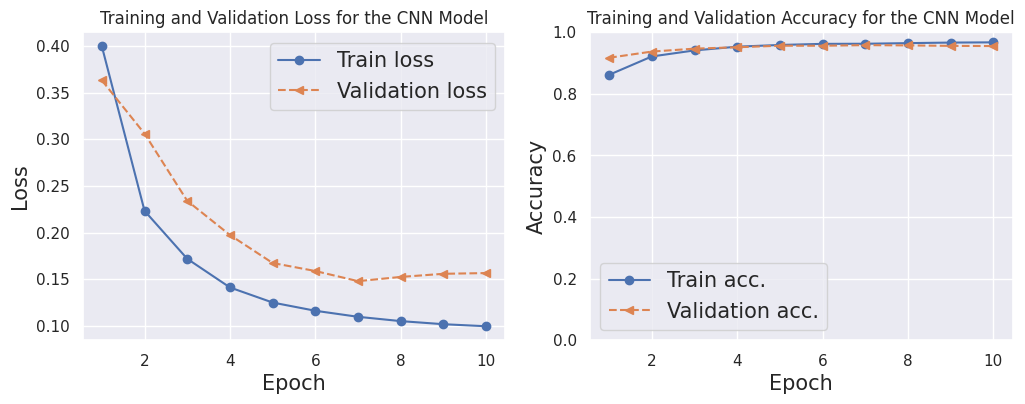

final train loss: 0.100
final train accuracy: 0.967
final val loss: 0.157
final val accuracy: 0.955


In [124]:
#Plot CNN Model performance curves
hist = model_cnn_history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.set_title("Training and Validation Loss for the CNN Model")

ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
ax.set_title("Training and Validation Accuracy for the CNN Model")
ax.set_ylim(0,1)
plt.show()

print('final train loss: %.3f' %model_cnn_history.history['loss'][-1])
print('final train accuracy: %.3f' %model_cnn_history.history['accuracy'][-1])

print('final val loss: %.3f' %model_cnn_history.history['val_loss'][-1])
print('final val accuracy: %.3f' %model_cnn_history.history['val_accuracy'][-1])

In [125]:
#Evaluate on test data
model_cnn_test_loss, model_cnn_test_accuracy = model_cnn.evaluate(X_test_padded, np.array(y_test))
print(f"Test Loss: {model_cnn_test_loss:.4f}, Test Accuracy: {model_cnn_test_accuracy:.4f}")

365/365 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9610 - loss: 0.1366
Test Loss: 0.1371, Test Accuracy: 0.9580


In [126]:
sample_padded = pad_sequences(sample_sequences, maxlen=400, padding='post', truncating='post')
model_cnn.evaluate(sample_padded, np.array(reviews_sample_df_y))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7500 - loss: 0.7107


[0.7107353210449219, 0.75]

In [127]:
model_cnn.predict(sample_padded)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


array([[0.0217362 ],
       [0.4692714 ],
       [0.02007446],
       [0.88704824],
       [0.00309913],
       [0.99929255],
       [0.9850603 ],
       [0.57140505]], dtype=float32)

In [63]:
#reduce overfitting in CNN model
#CNN with 1 convolutional layers
np.random.seed(1)

# Tokenize the text data
vocab_size = 1000  # Vocabulary size
oov_token = "<OOV>"  # Out-of-vocabulary token
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)

#create the vocabulary list based on reviews
tokenizer.fit_on_texts(np.array(X_train))


# Convert text to numerical sequences
X_train_sequences = tokenizer.texts_to_sequences(np.array(X_train))
X_val_sequences = tokenizer.texts_to_sequences(np.array(X_val))
X_test_sequences = tokenizer.texts_to_sequences(np.array(X_test))

# Pad sequences to make sure all reviews are the same input length
max_length = 200  # Maximum length of sequences
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post', truncating='post')
X_val_padded = pad_sequences(X_val_sequences, maxlen=max_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding='post', truncating='post')

tf.random.set_seed(1)

# Embed our training vocabulary into 10 dimensions.
embedding_dim = 10

def build_model():
    ''''''
    # clear session and set a random seed for consistent behavior.
    tf.keras.backend.clear_session()
    tf.random.set_seed(1)

    # define model
    model = tf.keras.Sequential()

    ## add embedding layer ##
    #########################
    # (this is our imput layer)
    # embeddings will be learned during training
    # the weights for the embeddings are randomly initialized (just like any other layer!)
    model.add(Embedding(
        input_dim=vocab_size,
        output_dim=10,
        input_length=200, #limits length of sentence to 400 tokens
        name="embedding")
        ),

    # ## first convolution ##
    # #######################
    # model.add(Conv1D(
    #     filters=128,
    #     kernel_size=4,
    #     padding='same',
    #     activation='relu'))

    # # add dropout layer
    # model.add(tf.keras.layers.Dropout(
    #     rate=0.5))

    # # add maxpooling
    # model.add(MaxPooling1D(pool_size=2))

    ## second convolution ##
    ########################
    model.add(Conv1D(
        filters=64,
        kernel_size=4,
        padding='same',
        activation='relu'))

    # add dropout layer
    model.add(tf.keras.layers.Dropout(
        rate=0.5))

    # add maxpooling
    model.add(MaxPooling1D(pool_size=2))


    ## average embeddings ##
    ########################
    model.add(GlobalAveragePooling1D()),

    # add dropout layer
    model.add(tf.keras.layers.Dropout(
        rate=0.5))



    ## add final dense (output) layer ##
    ####################################
    model.add(Dense(1, activation='sigmoid'))

    # print model summary
    model.summary()

    return model


model_cnn_3 = build_model()

model_cnn_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

np.random.seed(1)
model_cnn_history_3 = model_cnn_3.fit(
    np.array(X_train_padded), np.array(y_train), epochs=10,
          validation_data=(np.array(X_val_padded), np.array(y_val)))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.7778 - loss: 0.4791 - val_accuracy: 0.9140 - val_loss: 0.3410
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9043 - loss: 0.2704 - val_accuracy: 0.9438 - val_loss: 0.2309
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9319 - loss: 0.1939 - val_accuracy: 0.9531 - val_loss: 0.1877
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9445 - loss: 0.1638 - val_accuracy: 0.9552 - val_loss: 0.1788
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9528 - loss: 0.1436 - val_accuracy: 0.9581 - val_loss: 0.1593
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9583 - loss: 0.1294 - val_accuracy: 0.9583 - val_loss: 0.1540
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9579 - loss: 0.1305 - val_accuracy: 0.9605 - val_loss: 0.1442
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9596 - loss: 0.1224 - v

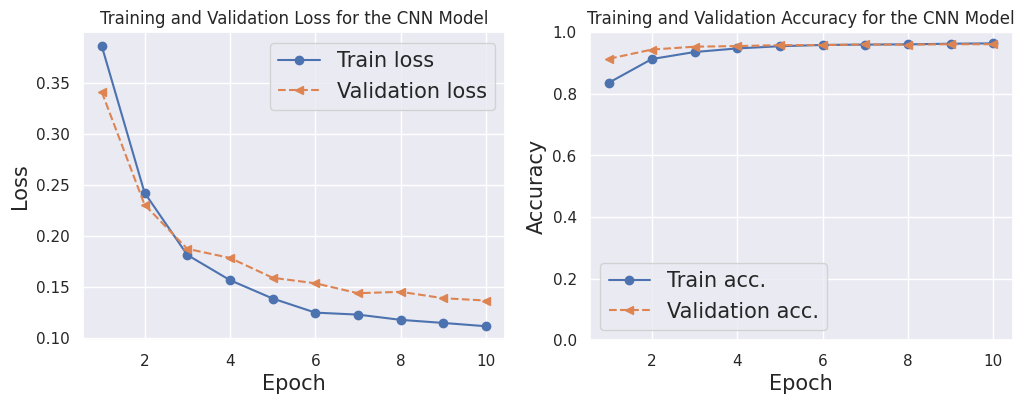

final train loss: 0.112
final train accuracy: 0.964
final val loss: 0.137
final val accuracy: 0.961


In [64]:
#Plot CNN Model performance curves
hist = model_cnn_history_3.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.set_title("Training and Validation Loss for the CNN Model")

ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
ax.set_title("Training and Validation Accuracy for the CNN Model")
ax.set_ylim(0,1)
plt.show()

print('final train loss: %.3f' %model_cnn_history_3.history['loss'][-1])
print('final train accuracy: %.3f' %model_cnn_history_3.history['accuracy'][-1])

print('final val loss: %.3f' %model_cnn_history_3.history['val_loss'][-1])
print('final val accuracy: %.3f' %model_cnn_history_3.history['val_accuracy'][-1])

In [65]:
#Evaluate on test data
model_cnn_test_loss, model_cnn_test_accuracy = model_cnn_3.evaluate(X_test_padded, np.array(y_test))
print(f"Test Loss: {model_cnn_test_loss:.4f}, Test Accuracy: {model_cnn_test_accuracy:.4f}")

365/365 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9625 - loss: 0.1216
Test Loss: 0.1222, Test Accuracy: 0.9621


#### Inspect the Learned Embeddings of the CNN Model

In [35]:
embeddings_cnn = model_cnn.get_layer('embedding').get_weights()[0]

In [36]:
# create an instance of the PCA class
pca = PCA(n_components=2) # PCA imported from sklearn.decomposition

# fit the data using the original X_train_std data; tranform X_train_std data
embeddings_trained_pca = pca.fit_transform(embeddings_cnn)

# visualize
display(pd.DataFrame(embeddings_trained_pca).head())

,0,1
0,-3.584246,1.746004
1,0.034146,-0.135384
2,-0.075733,0.051405
3,0.035941,0.056105
4,-0.105268,-0.007880


In [37]:
count = 0
for k in tokenizer.word_index.keys():
  count += 1
  print(k)
  if count == 3:
    break


<OOV>
the
to


In [38]:
def plot_2d_embeddings(embeddings, id_start=1, count=100):
  # Get 1st and 2nd embedding dims for the desired tokens.
  x1 = embeddings[id_start:id_start+count, 0]
  x2 = embeddings[id_start:id_start+count, 1]

  # Get the corresponding words from the reverse index (for labeling).
  #tokens = [tokenizer.word_index.keys()[i] for i in range(id_start, id_start+count)]
  tokens = [k for k in tokenizer.word_index.keys()]

  # Plot with the plotly library.
  data = plotly.Scatter(x=x1, y=x2, text=tokens,
                        mode='markers', textposition='bottom left',
                        hoverinfo='text')
  fig = plotly.Figure(data=[data],
                      layout=plotly.Layout(title="Word Embeddings",
                                           hovermode='closest'))
  fig.show()

# Very frequent tokens tend to be more syntactic than semantic, so let's plot
# some rarer words.
plot_2d_embeddings(embeddings_cnn, id_start=1, count=500)